In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from ast import literal_eval
from wordcloud import WordCloud, STOPWORDS

In [61]:
df_movies = pd.read_csv('datasets/movies_dataset.csv')

C:\Users\jsart\AppData\Local\Temp\ipykernel_23276\2313297727.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movies = pd.read_csv('datasets/movies_dataset.csv')


Usaré nube de palabra de títulos y descripción general para obserbar las palabras que aparecn con mayor frecuencia

In [62]:
df_movies['title'] = df_movies['title'].astype('str')
df_movies['overview'] = df_movies['overview'].astype('str')

In [63]:
title_corpus = ' '.join(df_movies['title'])
overview_corpus = ' '.join(df_movies['overview'])

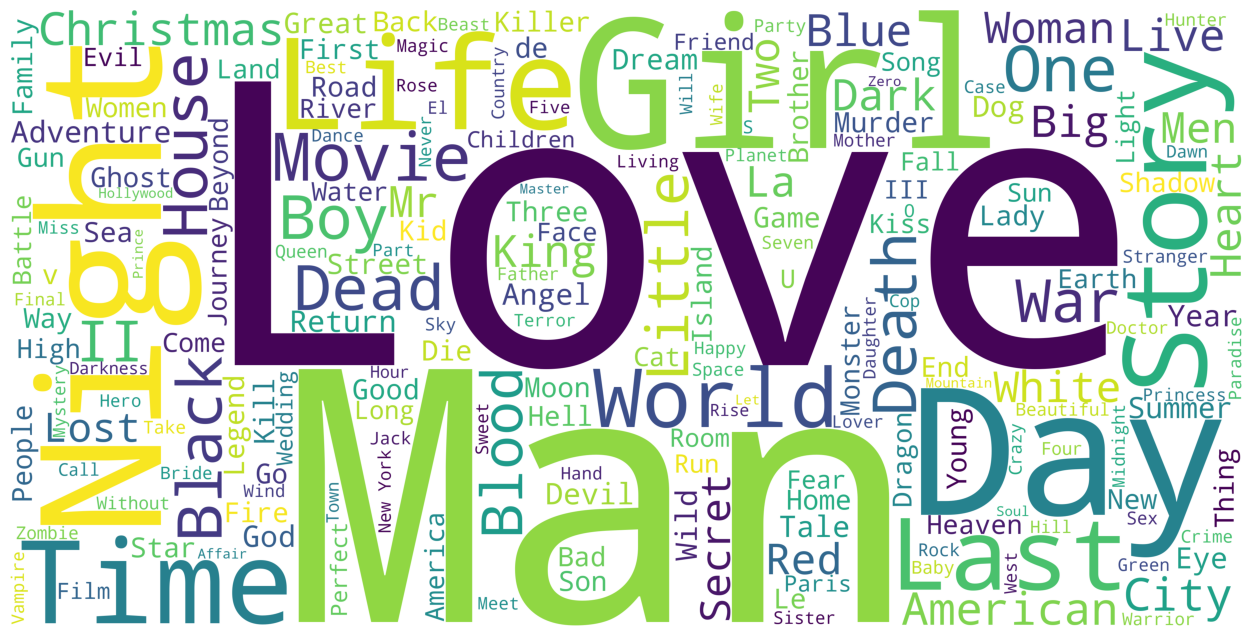

In [38]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [4]:
#Observar las 5 primeras filas del dataframe
df_movies.head(5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [64]:
#Observar las 5 últimas filas del dataframe
df_movies.tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,0.163015,/s5UkZt6NTsrS7ZF0Rh8nzupRlIU.jpg,[],"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0


In [65]:
df_movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

Realizamos una partición para conocer las distintas columnas del DF

In [66]:
df_movies.iloc[:,0:7].sample(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id
22181,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,54236,tt0072030
24498,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,212846,tt3091380
2018,False,NaN,300000,"[{'id': 18, 'name': 'Drama'}]",NaN,118452,tt0128214
3437,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,28971,tt0044837
29511,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,77128,tt0081975
36493,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,234815,tt0075089
36548,False,"{'id': 309259, 'name': 'Naked Collection', 'po...",0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,127329,tt1857797
543,False,NaN,50000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,9057,tt0111400
26114,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",NaN,243568,tt3118958
31779,False,NaN,0,[],http://espn.go.com/30for30/film?page=thisiswha...,232048,tt3267334


In [67]:
df_movies.iloc[:,7:15].sample(10)

,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date
24504,en,Breaking and Entering,The Guinness World of Records contains the mos...,0.118658,/ti2Q9qgAvOM2osIuJF7DDLo9Tqd.jpg,[],[],2011-01-14
44884,en,Site Unseen: An Emma Fielding Mystery,"Brilliant, dedicated, and driven, archaeologis...",0.86016,/iqO9ITNYfTHafJ8e1Y4buZ1Vfzp.jpg,"[{'name': 'Muse Entertainment', 'id': 83338}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2017-06-04
31381,fr,Le Premier cercle,"The Malakian clan, a family of ruthless gangst...",5.482028,/2pX3QO19REIeXU5gSs6reHYgp4F.jpg,"[{'name': 'TFM Distribution', 'id': 3011}]","[{'iso_3166_1': 'FR', 'name': 'France'}]",2009-03-03
1587,en,Bean,Bean works as a caretaker at Britain's formida...,12.799853,/pKGGzotqkNDEL2ix4VU1bWmteK5.jpg,"[{'name': 'Tiger Aspect Productions', 'id': 68...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1997-07-03
6398,en,Northfork,"""We are all angels. It is what we do with our ...",3.450973,/s1ZxtvOmaDX47Xv1pJmGoRWBnHE.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-01-01
38126,en,Forbidden Island,Divers search for a sunken treasure.,0.019608,/9Mrq3W2mYocoXHgV8Kji8PkifH7.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",1959-03-01
22220,fr,Les liens de sang,A Montreal police inspector (Donald Sutherland...,2.176251,/7JeK3kcbpyFNPXHCE7cDXnSSTDU.jpg,"[{'name': 'Cinévidéo', 'id': 14235}, {'name': ...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1978-02-01
36578,en,Scene from the Elevator Ascending Eiffel Tower,“A marvelously clear picture taken from the to...,0.071815,/dxtWiUBLhGFwwMkQeE3tM3bnyHR.jpg,"[{'name': 'Edison Manufacturing Company', 'id'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1900-08-21
32404,en,How to Follow Strangers,There is a true story of a woman who died in h...,0.779087,/4EhGLxZVqLYWIRBW67kbD0MJ1AB.jpg,[],[],2013-10-28
36194,en,Amerikana,Following the Dogma rules does not make this f...,0.039918,/uHvWRpv1LfLpMxaAkmC22J0OMeG.jpg,[],"[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",2001-05-15


In [68]:
df_movies.iloc[:,15:23].sample(10)

,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average
20915,0.0,76.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Story of The Third Wave,Lesson Plan,False,0.0
16544,951179.0,107.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Eat, drink and try not to kill each other.",The Trip,False,7.0
25331,0.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Don't go home,Dead Souls,False,3.9
36660,0.0,75.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Destroy Yourselves,False,8.0
44274,369907963.0,140.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,For freedom. For family. For the planet.,War for the Planet of the Apes,False,6.7
19848,0.0,119.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Chronicle of My Mother,False,6.6
22997,0.0,80.0,[],Released,NaN,Blind Date,False,4.5
24817,0.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A terrifying force that cannot be resisted is ...,Prime Evil,False,4.6
8554,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,The Loneliness of the Long Distance Runner,False,7.5
27658,0.0,96.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,The Hyperboloid of Engineer Garin,False,4.0


Observamos el tipo de dato de cada columna

In [69]:
df_movies.iloc[:,0:12].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   adult                  45466 non-null  object
 1   belongs_to_collection  4494 non-null   object
 2   budget                 45466 non-null  object
 3   genres                 45466 non-null  object
 4   homepage               7782 non-null   object
 5   id                     45466 non-null  object
 6   imdb_id                45449 non-null  object
 7   original_language      45455 non-null  object
 8   original_title         45466 non-null  object
 9   overview               45466 non-null  object
 10  popularity             45461 non-null  object
 11  poster_path            45080 non-null  object
dtypes: object(12)
memory usage: 4.2+ MB


In [70]:
df_movies.iloc[:,12:23].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   production_companies  45463 non-null  object 
 1   production_countries  45463 non-null  object 
 2   release_date          45379 non-null  object 
 3   revenue               45460 non-null  float64
 4   runtime               45203 non-null  float64
 5   spoken_languages      45460 non-null  object 
 6   status                45379 non-null  object 
 7   tagline               20412 non-null  object 
 8   title                 45466 non-null  object 
 9   video                 45460 non-null  object 
 10  vote_average          45460 non-null  float64
dtypes: float64(3), object(8)
memory usage: 3.8+ MB


In [71]:
pd.set_option('display.max_columns',None)

**Duplicados**

In [72]:
#Observamos la cantidad de filas duplicadas
df_movies.duplicated().sum()

13

In [73]:
duplicated_rows = df_movies[df_movies.duplicated()]
duplicated_rows

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
1465,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,105045,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",0.122178,/5WFIrBhOOgc0jGmoLxMZwWqCctO.jpg,"[{'name': 'Studio Babelsberg', 'id': 264}, {'n...","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",1995-02-16,0.0,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.0,1.0
9165,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,5511,tt0062229,fr,Le Samouraï,Hitman Jef Costello is a perfectionist who alw...,9.091288,/cvNW8IXigbaMNo4gKEIps0NGnhA.jpg,"[{'name': 'Fida cinematografica', 'id': 73}, {...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1967-10-25,39481.0,105.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,There is no solitude greater than that of the ...,Le Samouraï,False,7.9,187.0
9327,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",NaN,23305,tt0295682,en,The Warrior,"In feudal India, a warrior (Khan) who renounce...",1.967992,/9GlrmbZO7VGyqhaSR1utinRJz3L.jpg,"[{'name': 'Filmfour', 'id': 6705}]","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2001-09-23,0.0,86.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,The Warrior,False,6.3,15.0
13375,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,0.411949,/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg,"[{'name': 'Filmiteollisuus Fine', 'id': 5166}]","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
16764,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,0.411949,/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg,"[{'name': 'Filmiteollisuus Fine', 'id': 5166}]","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
21165,False,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,119916,tt0080000,en,The Tempest,"Prospero, the true Duke of Milan is now living...",0.000018,/gLVRTxaLtUDkfscFKPyYrCtRnTk.jpg,[],[],1980-02-27,0.0,123.0,[],Released,NaN,The Tempest,False,0.0,0.0
21854,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",NaN,152795,tt1821641,en,The Congress,More than two decades after catapulting to sta...,8.534039,/nnKX3ahYoT7P3au92dNgLf4pKwA.jpg,"[{'name': 'Pandora Filmproduktion', 'id': 254}...","[{'iso_3166_1': 'BE', 'name': 'Belgium'}, {'is...",2013-05-16,455815.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Congress,False,6.4,165.0
22151,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",http://www.daysofdarknessthemovie.com/,18440,tt0499456,en,Days of Darkness,When a comet strikes Earth and kicks up a clou...,1.436085,/tWCyKXHuSrQdLAvNeeVJBnhf1Yv.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2007-01-01,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Days of Darkness,False,5.0,5.0
23044,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,25541,tt1327820,da,Broderskab,Former Danish servicemen Lars and Jimmy are th...,2.587911,/q19Q5BRZpMXoNCA4OYodVozfjUh.jpg,[],"[{'iso_3166_1': 'SE', 'name': 'Sweden'}, {'iso...",2009-10-21,0.0,90.0,"[{'iso_639_1': 'da', 'name': 'Dansk'}]",Released,NaN,Brotherhood,False,7.1,21.0
24844,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.dealthemovie.com/,11115,tt0446676,en,Deal,As an ex-gambler teaches a hot-shot college ki...,6.880365,/kHaB

Al tratarse de filas enteras duplicadas, estas no porporcionan información adicional a sus duplicados, por lo que procedemos a eliminarlas.

In [74]:
df_movies=df_movies.drop_duplicates()

In [75]:
df_movies.duplicated().sum()

0

In [76]:
df_movies.shape

(45453, 24)

Conoscamos en profunidad las columnas con el metodo *describe()*

In [77]:
df_movies.describe(exclude=[object])

,revenue,runtime,vote_average,vote_count
count,4.544700e+04,45190.000000,45447.000000,45447.000000
mean,1.121254e+07,94.124696,5.618199,109.918256
std,6.434117e+07,38.411790,1.924198,491.378000
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [78]:
df_movies.describe(exclude=[np.number])

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,video
count,45453,4494,45453,45453,7780,45453,45436,45442,45453,45453,45448,45067,45450,45450,45366,45447,45366,20408,45453,45447
unique,5,1698,1226,4069,7673,45436,45417,92,43373,44308,44176,45024,22708,2393,17336,1931,6,20283,42278,2
top,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 18, 'name': 'Drama'}]",http://www.georgecarlin.com,265189,0,en,Hamlet,nan,0.0,/5D7UBSEgdyONE6Lql6xS7s6OLcW.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2008-01-01,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Cinderella,False
freq,45441,29,36561,4999,12,2,3,32262,8,954,34,5,11872,17849,136,22391,45002,7,11,45354


**VALORES FALTANTES**

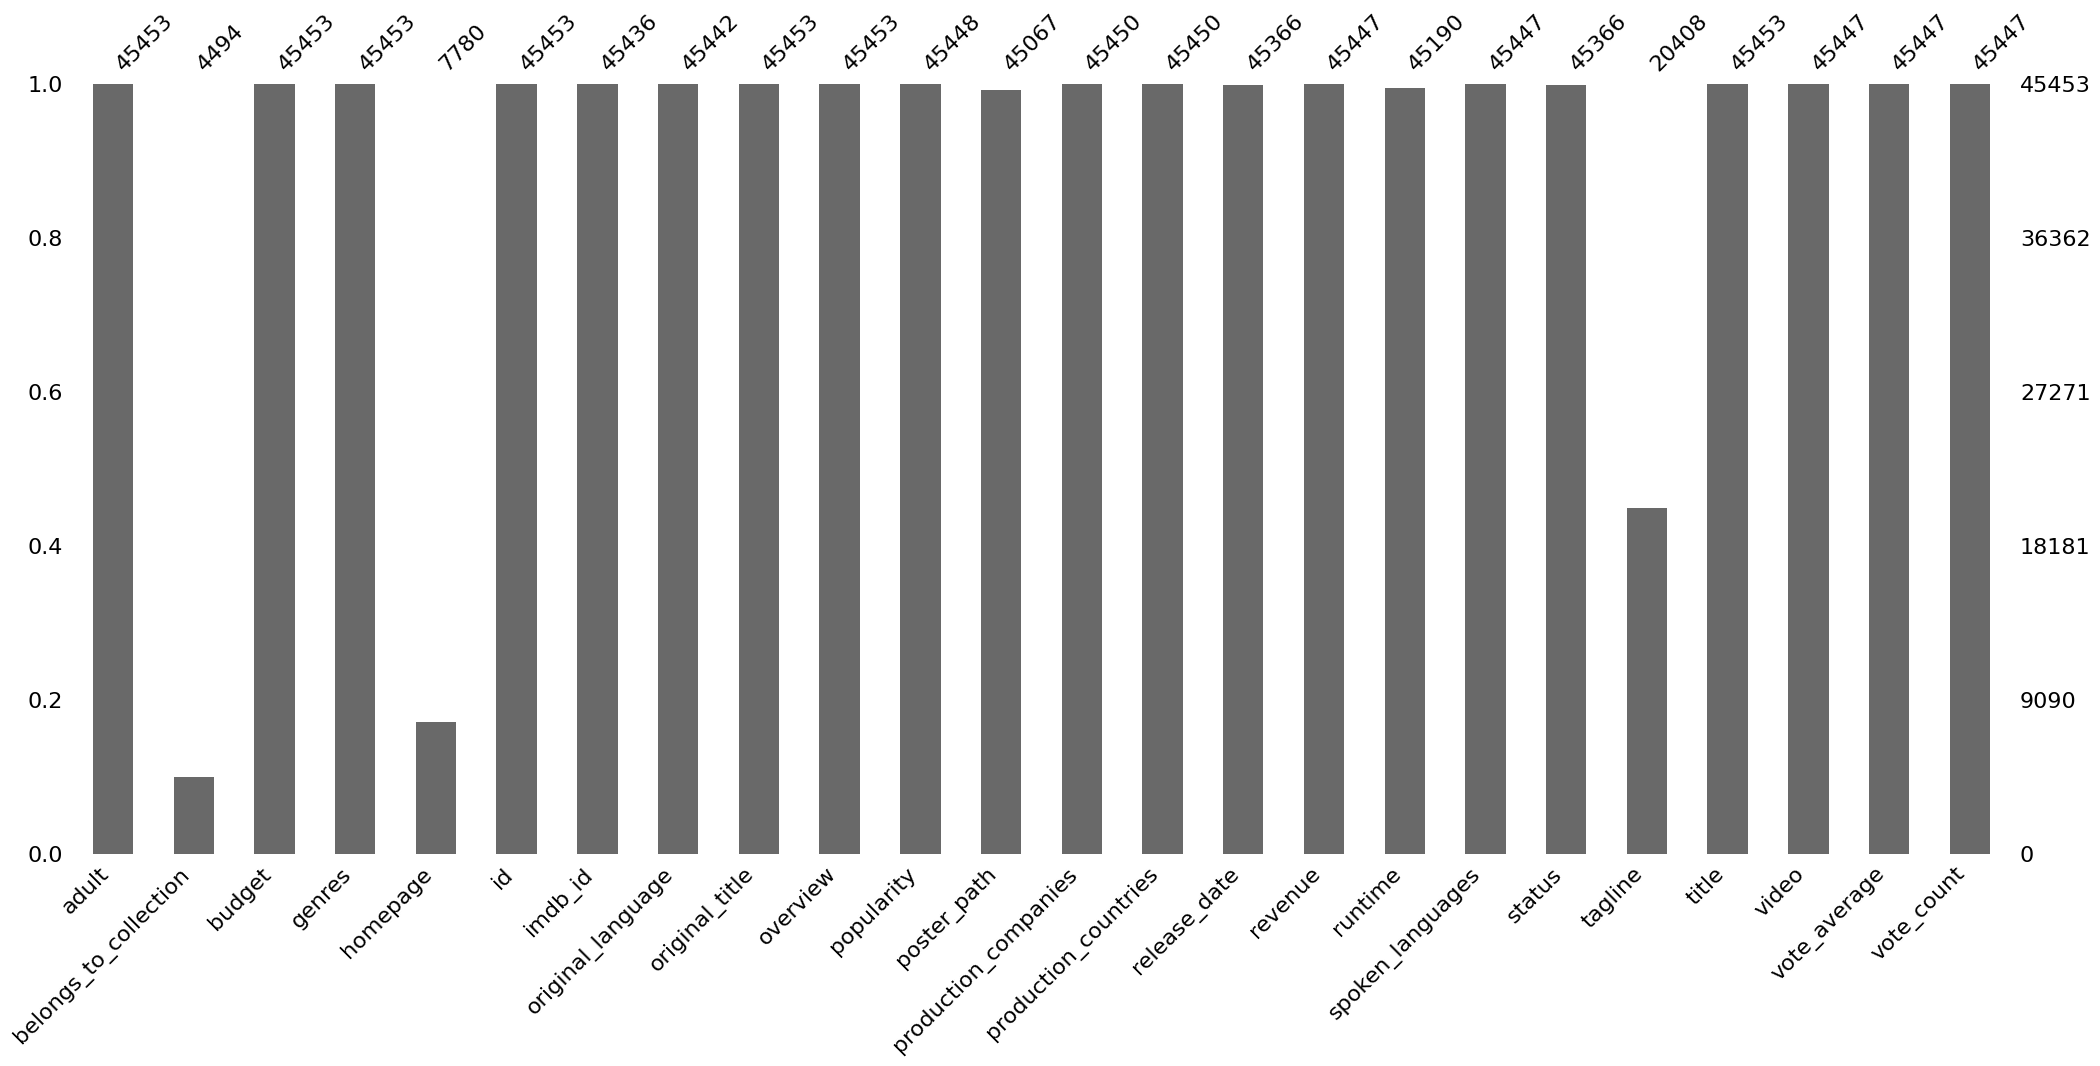

In [79]:
#Analizamos graficamente los datos faltantes:
msno.bar(df_movies)
plt.show()

In [80]:
#Cantidad de datos faltantes por variable
df_movies.isnull().sum().sort_values()

adult                        0
budget                       0
genres                       0
title                        0
id                           0
original_title               0
overview                     0
production_countries         3
production_companies         3
popularity                   5
video                        6
spoken_languages             6
revenue                      6
vote_count                   6
vote_average                 6
original_language           11
imdb_id                     17
release_date                87
status                      87
runtime                    263
poster_path                386
tagline                  25045
homepage                 37673
belongs_to_collection    40959
dtype: int64

In [81]:
df_movies.size

1090872

In [82]:
# hallando el total de valores faltantes
valores_faltantes=df_movies.isna().sum().sum()
valores_completos=df_movies.size-df_movies.isna().sum().sum()
print(f'cantidad de valores faltantes: {valores_faltantes}')
print(f'catidad de datos completos: {valores_completos}')
print(f'proporcion de valores faltantes:  {valores_faltantes/df_movies.size}')

cantidad de valores faltantes: 104569
catidad de datos completos: 986303
proporcion de valores faltantes:  0.09585817584464539


In [84]:
#creando funcion funcion para hallar los valores faltantes por columnas el total de casos 
def valores_faltantes_colum(df):
    return df.isnull().pipe(
        lambda df1: (
            df1.sum()
            .reset_index(name="var_faltante")
            .rename(columns={"index": "variable"})
            .assign(
                var_totales=len(df1),
                porcentaje_faltantes=lambda df2: df2.var_faltante / df2.var_totales * 100,
            )
        )
    )

In [25]:
valores_faltantes_colum(df_movies)

,variable,var_faltante,var_totales,porcentaje_faltantes
0,adult,0,45453,0.000000
1,belongs_to_collection,40959,45453,90.112864
2,budget,0,45453,0.000000
3,genres,0,45453,0.000000
4,homepage,37673,45453,82.883418
5,id,0,45453,0.000000
6,imdb_id,17,45453,0.037401
7,original_language,11,45453,0.024201
8,original_title,0,45453,0.000000
9,overview,954,45453,2.098871


**Modelo de recomendaciones**

In [50]:
import random
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [87]:
df_movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


Como son muchos datos, la siilitud del coceno que estoy usando en mi modelo no puede procesar tantos datos, por lo que el modelo se cae, así que usaré la quinta parte de los datos totales de manera aleatoria

In [94]:
# Obtén la cantidad total de filas del DataFrame original
total_filas = len(df_movies)

# Calcula la cantidad de filas para el nuevo DataFrame
filas_nuevo_df = int(total_filas / 5)

# Genera una lista de índices aleatorios sin repetición
indices_aleatorios = random.sample(range(total_filas), filas_nuevo_df)

# Extrae las filas correspondientes a los índices aleatorios en un nuevo DataFrame
df_modelo = df_movies.iloc[indices_aleatorios]

# Reinicia los índices del nuevo DataFrame
df_modelo = df_modelo.reset_index(drop=True)


In [95]:
df_modelo


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,42444,tt0105717,it,Vacanze Di Natale '91,This coarse bedroom farce takes place at the S...,1.794023,/cUPKPyAEnXnpaiX7Hz3BOV7nJLY.jpg,[],"[{'iso_3166_1': 'IT', 'name': 'Italy'}]",1991-12-20,0.0,112.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,Christmas Vacation '91,False,4.5,28.0
1,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.hallmarkchannel.com/aringbyspring,258691,tt3346986,en,A Ring by Spring,One woman's unexpected race to the altar teach...,0.486972,/xKtgWq0rNr5NSeMZCXdQ0KGB1c.jpg,[],[],2014-03-08,0.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,A Ring by Spring,False,5.4,5.0
2,False,NaN,500000,"[{'id': 99, 'name': 'Documentary'}]",http://ethosthemovie.com,57510,tt1707818,en,Ethos,Hosted by twice Oscar nominated actor and acti...,0.524436,/9dlIL6qDl11aT1lfE4Ee9Gjfa91.jpg,[],[],2011-01-01,0.0,72.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,You are the solution,Ethos,False,7.1,4.0
3,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,27631,tt0435724,en,"Richard Pryor: I Ain't Dead Yet, #*%$#@!!",This documentary praises comedian Richard Pryo...,0.85116,/fswi5N26buklBLiIYxwlZ08vuKS.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-01-01,0.0,40.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,"Richard Pryor: I Ain't Dead Yet, #*%$#@!!",False,0.0,0.0
4,False,NaN,25000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,13120,tt0989000,en,In Search of a Midnight Kiss,"Broke and alone on New Year's Eve, Wilson just...",1.573576,/xF4oqHpW6SJe8Gno4kHwzDHPaS6.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2007-04-27,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,In Search of a Midnight Kiss,False,6.4,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9085,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,62529,tt0240912,en,Sound and Fury,A documentary film released in 2000 about two ...,0.245355,/oFnaBXNMeEzhNGlASDI4yjJkE9r.jpg,[],[],2000-10-29,0.0,80.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"If you could make your deaf children hear, wou...",Sound and Fury,False,5.4,7.0
9086,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",NaN,43034,tt0053901,en,Hell to Eternity,"Based on the story about Guy Gabaldon, a Los A...",0.157003,/sKwmqZOAoXckRdkgAw3bLvMMp4z.jpg,"[{'name': 'Allied Artists Pictures', 'id': 492...","[{'iso_3166_1': 'US', 'name': 'United States o...",1960-08-01,0.0,131.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Marines' Battle Cry of the South Pacific!,Hell to Eternity,False,10.0,1.0
9087,False,"{'id': 17178, 'name': 'Jackass Collection', 'p...",11000000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,12094,tt0493430,en,Jackass Number Two,Jackass Number Two is a compilation of various...,7.915368,/tu4BZcdkAuah70ilVT30Wfo2HjF.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-09-22,72778712.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Guess who just made number two?,Jackass Number Two,False,6.4,306.0
9088,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,20495,tt0418362,en,Mujhse Shaadi Karogi,"Sameer, fast at losing his temper is re-locate...",1.898123,/4MMKdA5qSIb1sbSZg6mVc6BRQRy.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2004-07-30,0.0,164.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,How to win a girl's heart,Mujhse Shaadi Karogi,False,6.7,23.0


In [96]:
df_modelo['tagline'] = df_modelo['tagline'].fillna('')
df_modelo['description'] = df_modelo['overview'] + df_modelo['tagline']
df_modelo['description'] = df_modelo['description'].fillna('')

In [97]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df_modelo['description'])

In [103]:
tfidf_matrix.shape

(9090, 274061)

**El modelo se desarrollará con semejanza de coseno**

In [98]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [99]:
cosine_sim[0]

array([1.        , 0.        , 0.00230732, ..., 0.        , 0.        ,
       0.        ])

In [100]:
df_modelo = df_modelo.reset_index()
df_modelo = df_modelo.rename(columns={'title': 'titulo'})
titles = df_modelo['titulo']
indices = pd.Series(df_modelo.index, index=df_modelo['title'])

In [106]:
indices

title
Christmas Vacation '91                          0
A Ring by Spring                                1
Ethos                                           2
Richard Pryor: I Ain't Dead Yet, #*%$#@!!       3
In Search of a Midnight Kiss                    4
                                             ... 
Sound and Fury                               9085
Hell to Eternity                             9086
Jackass Number Two                           9087
Mujhse Shaadi Karogi                         9088
I Got Next                                   9089
Length: 9090, dtype: int64

In [101]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices].head()

In [102]:
get_recommendations('The Family')


5669                       Live by Night
5520                         Cool as Ice
4729                           Miss Bala
2778    Kapitalism: Our Improved Formula
6349                          Easy Money
Name: title, dtype: object